## B1

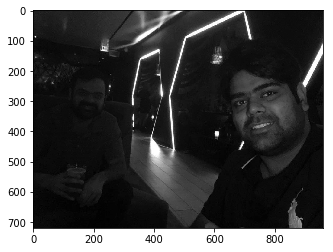

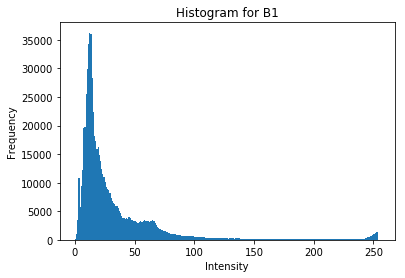

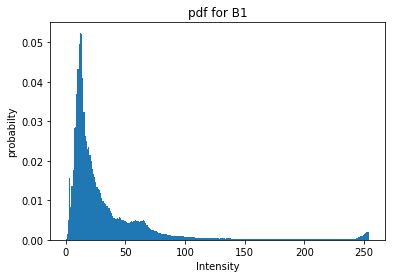

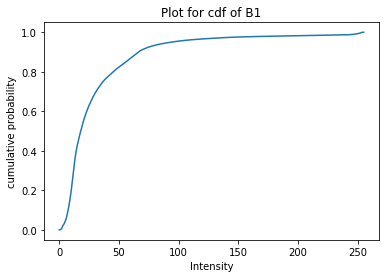

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading input image
imageArray_B1 = cv2.imread('bad.jpg')

# coverting image to gray scale
grayImage_B1 = 0.2989*imageArray_B1[:,:,0] + 0.5870*imageArray_B1[:,:,1] + 0.1140*imageArray_B1[:,:,2]

# plotting image
imgplot = plt.imshow(grayImage_B1, cmap = 'gray')
plt.show()

# Taking important variables
sizeX = len(grayImage_B1)    #Number of columns
sizeY = len(grayImage_B1[0]) #Number of rows
num_pixels = sizeX*sizeY
hist = np.zeros(256)
pdf_arr = np.zeros(256)
cdf_arr = np.zeros(256)

# Building histogram
for i in range(sizeX):
    for j in range(sizeY):
        val = int(grayImage_B1[i,j])
        hist[val] = hist[val]+1


# Plot Histogram that we previously generated
plt.hist(range(256),weights = hist, bins = 256)
plt.title("Histogram for B1")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()

# Normalization and pdf calculation
pdf_arr = hist/num_pixels

# Plotting pdf
plt.hist(range(256),weights = pdf_arr, bins = 256)
plt.title("pdf for B1")
plt.xlabel("Intensity")
plt.ylabel("probabilty")
plt.show()

# Calculating cdf 
sum_val = 0
for i in range(256):
    sum_val = sum_val + pdf_arr[i]
    cdf_arr[i] = sum_val

# Plotting cdf function
plt.plot(range(256),cdf_arr)
plt.title("Plot for cdf of B1")
plt.xlabel("Intensity")
plt.ylabel("cumulative probability")
plt.show()


## B2

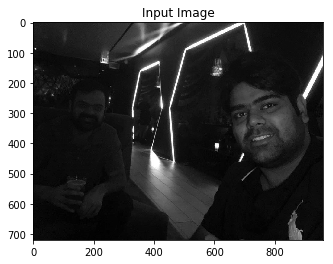

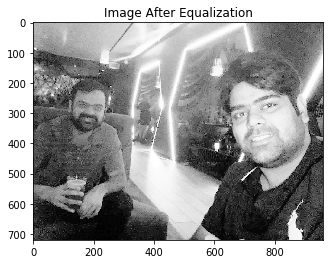

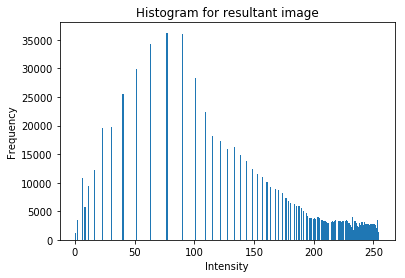

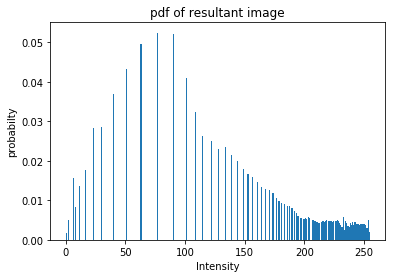

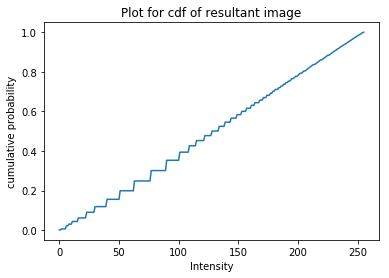

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# function for equilization
def Equilization_Function(out_tab, cdf_arr, sizeX, sizeY, grayImage_B1, grayImage_B2):
    
    # Equilization
    for i in range(256):
        out_tab[i] = round(cdf_arr[i]*255)


    for i in range(sizeX):
        for j in range(sizeY):
            grayImage_B2[i,j] = out_tab[int(grayImage_B1[i,j])]
    return grayImage_B2

# Reading input image
imageArray_B1 = cv2.imread('bad.jpg')

# coverting image to gray scale
grayImage_B1 = 0.2989*imageArray_B1[:,:,0] + 0.5870*imageArray_B1[:,:,1] + 0.1140*imageArray_B1[:,:,2]

# plotting image
imgplot = plt.imshow(grayImage_B1, cmap = 'gray')
plt.title("Input Image")
plt.show()

# Taking important variables
sizeX = len(grayImage_B1)    #Number of columns
sizeY = len(grayImage_B1[0]) #Number of rows
num_pixels = sizeX*sizeY
grayImage_B2 = np.copy(grayImage_B1)
hist = np.zeros(256)
pdf_arr = np.zeros(256)
cdf_arr = np.zeros(256)
out_tab = np.zeros(256)
B2_hist = np.zeros(256)
pdf_arr_B2 = np.zeros(256)
cumm_arr_B2 = np.zeros(256)

# Building histogram
for i in range(sizeX):
    for j in range(sizeY):
        val = int(grayImage_B1[i,j])
        hist[val] = hist[val]+1
        
# Normalization and pdf calculation
pdf_arr = hist/num_pixels

sum_val = 0
for i in range(256):
    sum_val = sum_val + pdf_arr[i]
    cdf_arr[i] = sum_val

# Calling Equilization Function
Equilization_Function(out_tab, cdf_arr, sizeX, sizeY, grayImage_B1, grayImage_B2)

# Showing the resultant image
imgplot = plt.imshow(grayImage_B2, cmap = 'gray')
plt.title("Image After Equalization")
plt.show()

# Histogram for new image
for i in range(sizeX):
    for j in range(sizeY):
        val = int(grayImage_B2[i,j])
        B2_hist[val] = B2_hist[val]+1

plt.hist(range(256),weights = B2_hist, bins = 256)
plt.title("Histogram for resultant image")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()

# PDF for the equilized image
pdf_arr_B2 = B2_hist/num_pixels

plt.hist(range(256),weights = pdf_arr_B2, bins = 256)
plt.title("pdf of resultant image")
plt.xlabel("Intensity")
plt.ylabel("probabilty")
plt.show()

# cdf for equilized image
sum_val = 0
for i in range(256):
    sum_val = sum_val + pdf_arr_B2[i]
    cumm_arr_B2[i] = sum_val

plt.plot(range(256),cumm_arr_B2)
plt.title("Plot for cdf of resultant image")
plt.xlabel("Intensity")
plt.ylabel("cumulative probability")
plt.show()


## B3

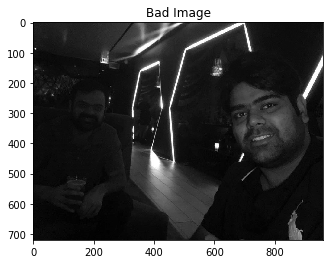

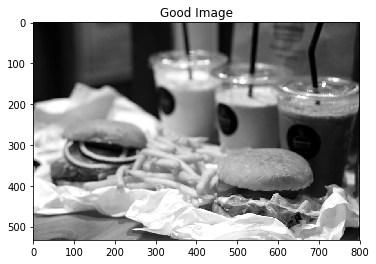

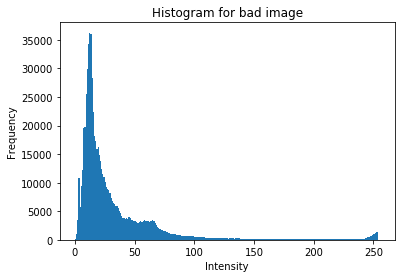

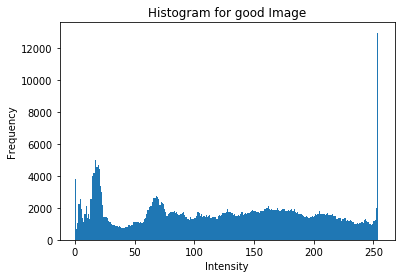

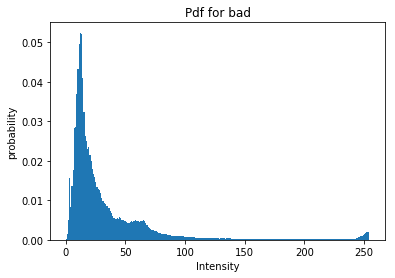

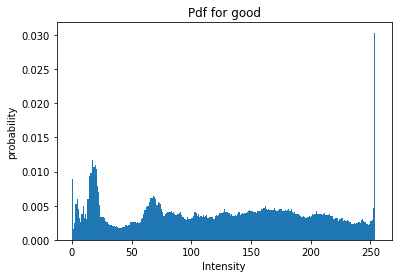

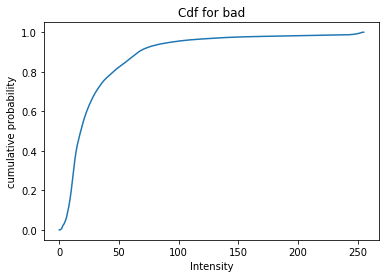

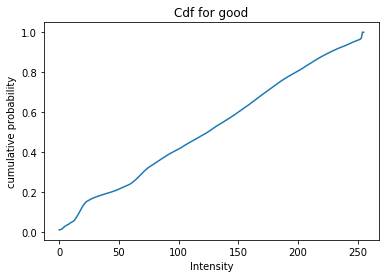

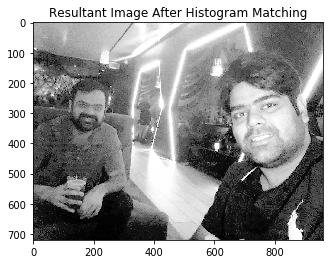

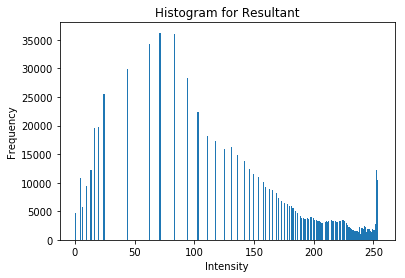

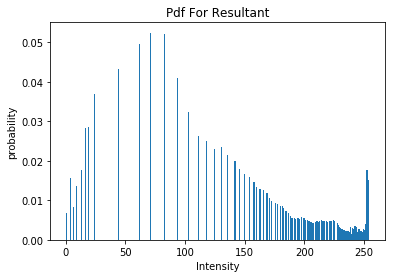

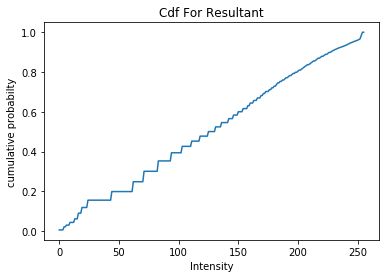

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Bad image
imageArray_B3_bad = cv2.imread('bad.jpg')

# Good image
imageArray_B3_good = cv2.imread('good.jpg')

# converting bad image to gray scale
grayImage_B3_bad = 0.2989*imageArray_B3_bad[:,:,0] + 0.5870*imageArray_B3_bad[:,:,1] + 0.1140*imageArray_B3_bad[:,:,2]

# converting good image to gray scale
grayImage_B3_good = 0.2989*imageArray_B3_good[:,:,0] + 0.5870*imageArray_B3_good[:,:,1] + 0.1140*imageArray_B3_good[:,:,2]

# plotting the bad image
imgplot = plt.imshow(grayImage_B3_bad, cmap = 'gray')
plt.title("Bad Image")
plt.show()

# plotting the goof image
imgplot = plt.imshow(grayImage_B3_good, cmap = 'gray')
plt.title("Good Image")
plt.show()

# taking X and Y for good and bad images
sizeX1 = len(grayImage_B3_bad)
sizeY1 = len(grayImage_B3_bad[0])

sizeX2 = len(grayImage_B3_good)
sizeY2 = len(grayImage_B3_good[0])

# some useful varialbles
hist1 = np.zeros(256)
hist2 = np.zeros(256)
pdf_arr1 = np.zeros(256)
pdf_arr2 = np.zeros(256)
num_pixels1 = sizeX1*sizeY1
num_pixels2 = sizeX2*sizeY2

cdf_arr1 = np.zeros(256)
cdf_arr2 = np.zeros(256)

# Calculating histogram for bad image
for i in range(sizeX1):
    for j in range(sizeY1):
        val = int(grayImage_B3_bad[i,j])
        hist1[val] = hist1[val]+1

# Histogram for bad image
plt.hist(range(256),weights = hist1, bins = 256)
plt.title("Histogram for bad image")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()

# Calculating Histogram for good image
for i in range(sizeX2):
    for j in range(sizeY2):
        val = int(grayImage_B3_good[i,j])
        hist2[val] = hist2[val]+1

# Histogram for good image
plt.hist(range(256),weights = hist2, bins = 256)
plt.title("Histogram for good Image")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()

# pdf for bad image
pdf_arr1 = hist1/num_pixels1

plt.hist(range(256),weights = pdf_arr1, bins = 256)
plt.title("Pdf for bad")
plt.xlabel("Intensity")
plt.ylabel("probability")
plt.show()

# pdf for good
pdf_arr2 = hist2/num_pixels2

plt.hist(range(256),weights = pdf_arr2, bins = 256)
plt.title("Pdf for good")
plt.xlabel("Intensity")
plt.ylabel("probability")
plt.show()

# calculating cdf for bad 
sum_val = 0
for i in range(256):
    sum_val = sum_val + pdf_arr1[i]
    cdf_arr1[i] = sum_val

# Calculating cdf for good
sum_val = 0
for i in range(256):
    sum_val = sum_val + pdf_arr2[i]
    cdf_arr2[i] = sum_val

# plot cdf for bad
plt.plot(range(256),cdf_arr1)
plt.title("Cdf for bad")
plt.xlabel("Intensity")
plt.ylabel("cumulative probability")
plt.show()

# plot cdf for good
plt.plot(range(256),cdf_arr2)
plt.title("Cdf for good")
plt.xlabel("Intensity")
plt.ylabel("cumulative probability")
plt.show()

# Histogram Matching
mapping_table = np.zeros(256)

for i in range(256):
    i_value = np.argmin(abs(cdf_arr1[i]-cdf_arr2))
    mapping_table[i] = i_value

output_image = np.copy(grayImage_B3_bad)
for i in range(sizeX1):
    for j in range(sizeY1):
        output_image[i][j] = mapping_table[int(grayImage_B3_bad[i,j])]
# Resultant Image After Histogram Matching
imgplot = plt.imshow(output_image, cmap = 'gray')
plt.title("Resultant Image After Histogram Matching")
plt.show()

# variables to calculate histogram, pdf and cdf for the resultant image
hist_final = np.zeros(256)
pdf_final = np.zeros(256)
cdf_final = np.zeros(256)
num_pixels_final = sizeY1*sizeX1

# Cal hist for Resultant
for i in range(sizeX1):
    for j in range(sizeY1):
        val = int(output_image[i,j])
        hist_final[val] = hist_final[val]+1

# hist for Resultant        
plt.hist(range(256),weights = hist_final, bins = 256)
plt.title("Histogram for Resultant")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()

# pdf for resultant image
pdf_final = hist_final/num_pixels_final

plt.hist(range(256),weights = pdf_final, bins = 256)
plt.title("Pdf For Resultant")
plt.xlabel("Intensity")
plt.ylabel("probability")
plt.show()

# cdf calculation for resultant image
sum_val = 0
for i in range(256):
    sum_val = sum_val + pdf_final[i]
    cdf_final[i] = sum_val
    
plt.plot(range(256),cdf_final)
plt.title("Cdf For Resultant")
plt.xlabel("Intensity")
plt.ylabel("cumulative probabilty")
plt.show()

